# Pima Indian Diabetes predictions - Predict the onset of diabetes based on diagnostic measures.

[Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 

Main tasks:
1. Data Cleanning 
    - Converting feature name into lower case for better readability
    - Check if there is any missing value
    - identify and delete rows that contain duplicate data
2. Data Exploration
    - Statistic
    - checking & handling any missing values or noise data
    - Histogram (distribution of all the features)
    - correlation
3. Data Preprocessing
    - Input/Output data
    - Train/Test split
3. Baseline models
    - Logistic Regression
    - KNN
    - Decision Tree
    - Naive Bayes
    - Support Vector Machine (SVM)
    - Ensemble Learning - Random Forest & Votting Classifier (Hard Votting)
    - Neural Network (Using Single Layer Perceptron)
4. Model Evaluation
    - Cross Validation scores
    - Model Comparison (Box plot)
5. Best model Selection based
    - SVM
6. Prediction
7. Model Validation
    - Confusion Matrix
    - Classification report
    - ROC (Receiver operating charactersticks) curve

In [1]:
# required modules
import os
import csv
import numpy as np
import pandas as pd 

import matplotlib as mpl
print(mpl.get_cachedir())
import matplotlib.pyplot as plt

C:\Users\User\.matplotlib


# Loading Data

In [2]:
df = pd.read_csv('diabetes.csv', delimiter=',', index_col=None)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Basic Data manipulation
    - Converting feature name into lower case for better readability
    - Check if there is any missing value
    - identify and delete rows that contain duplicate data

In [3]:
# Converting feature name into lower case for better readability
df.columns = [col.lower() for col in df.columns]
print(df.columns)

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')


In [4]:
# Check if there is any missing value
print(f"Original Data shape: {df.shape}")
print("---"*15)
print(f"If the data includes any nulls or missing:\n {df.isnull().sum() / df.shape[0]}")

Original Data shape: (768, 9)
---------------------------------------------
If the data includes any nulls or missing:
 pregnancies                 0.0
glucose                     0.0
bloodpressure               0.0
skinthickness               0.0
insulin                     0.0
bmi                         0.0
diabetespedigreefunction    0.0
age                         0.0
outcome                     0.0
dtype: float64


In [5]:
# identify and delete rows that contain duplicate data
def delete_dupllicates(data):
    duplicates = data.duplicated().any()
    if duplicates == True:
        data = data.drop_duplicates(inplace=True)
        print(f"Data shape after dropping the duplictes: {data.shape}")
    else:
        print(f"No duplicates indentified,original shape: {data.shape}")
        
# calling function
delete_dupllicates(df)

No duplicates indentified,original shape: (768, 9)


# Data statistics and information

In [6]:
# data descriptive
print(df.describe())
print() # blank line
# data info
print(df.info())

       pregnancies     glucose  bloodpressure  skinthickness     insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              bmi  diabetespedigreefunction         age     outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Data visualisation
- pairplot - relationship with target variable
- Box and whisker plots
- Heatmap - Correlation
- Distribution (Outcome - target varaible (class 0, 1)

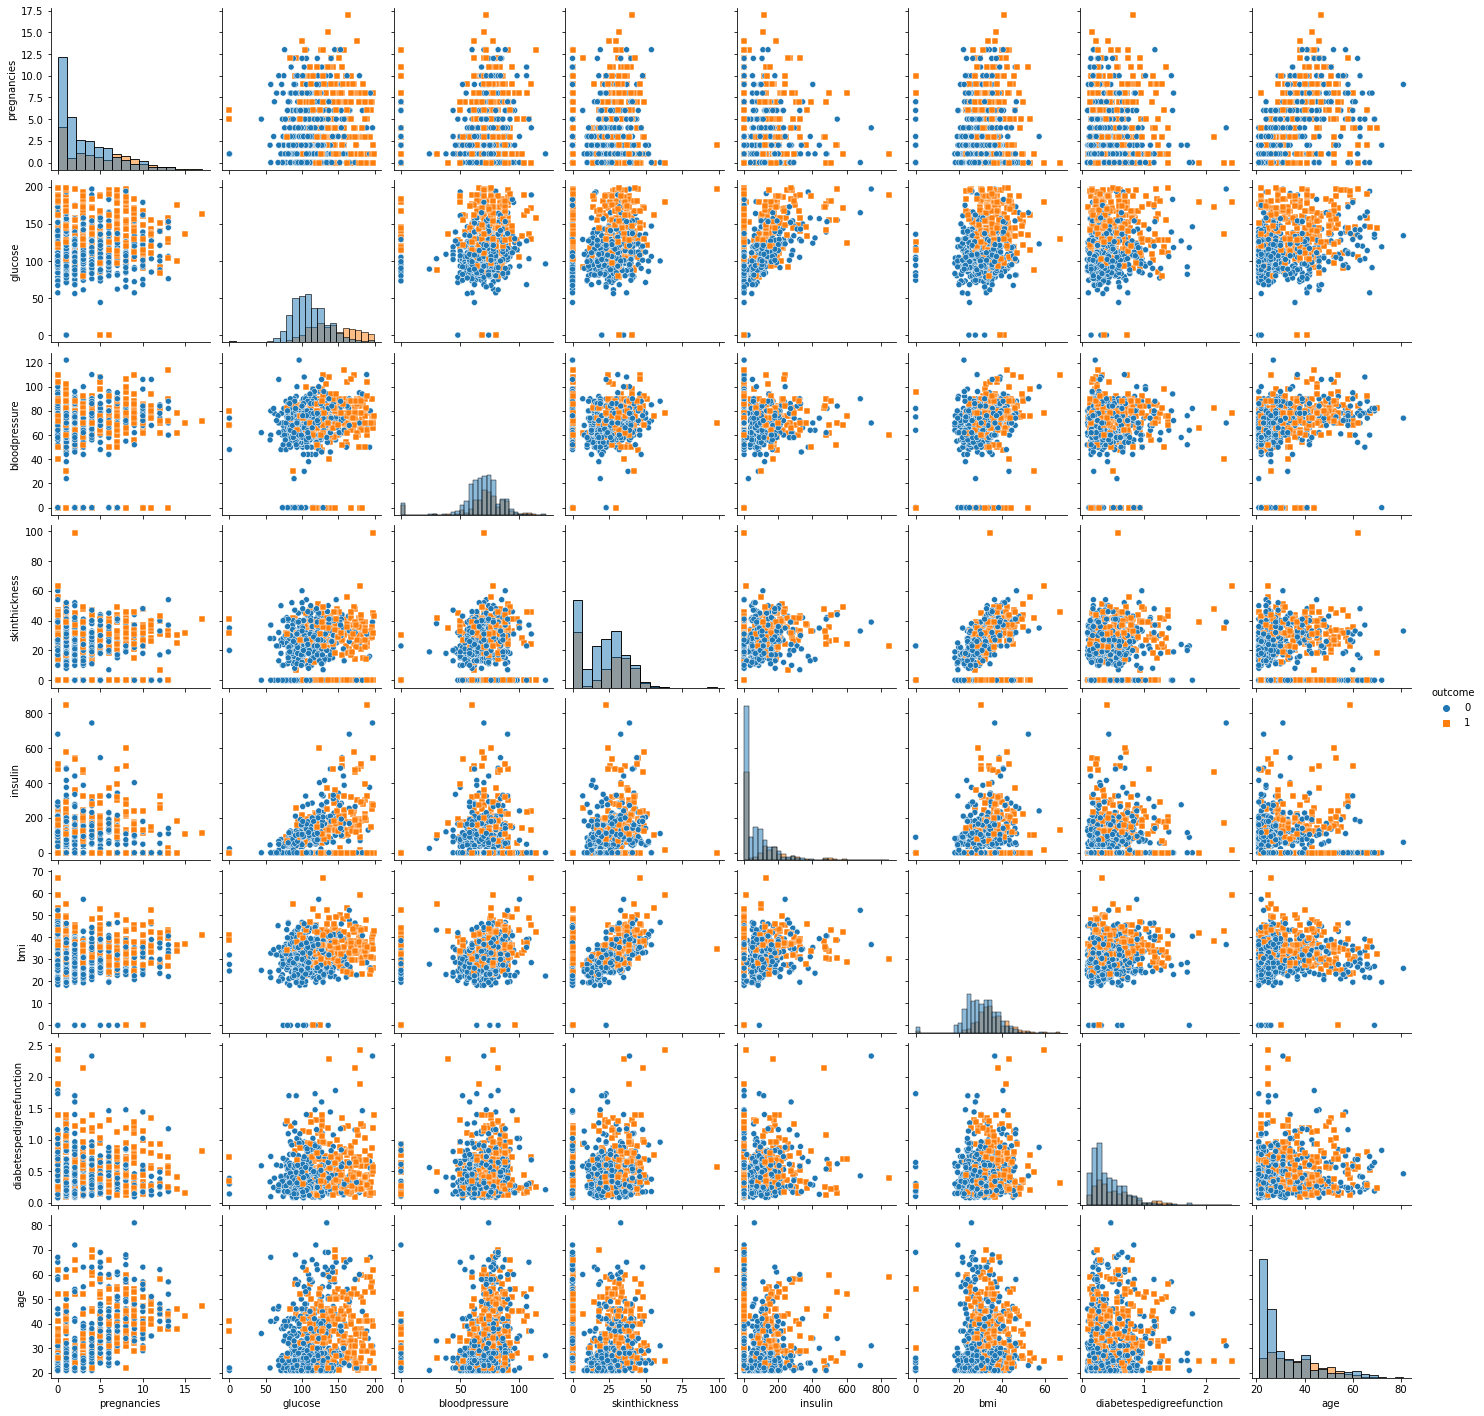

In [7]:
# pairplot
import seaborn as sns
sns.pairplot(df, hue='outcome', diag_kind="hist", markers=["o", "s"])

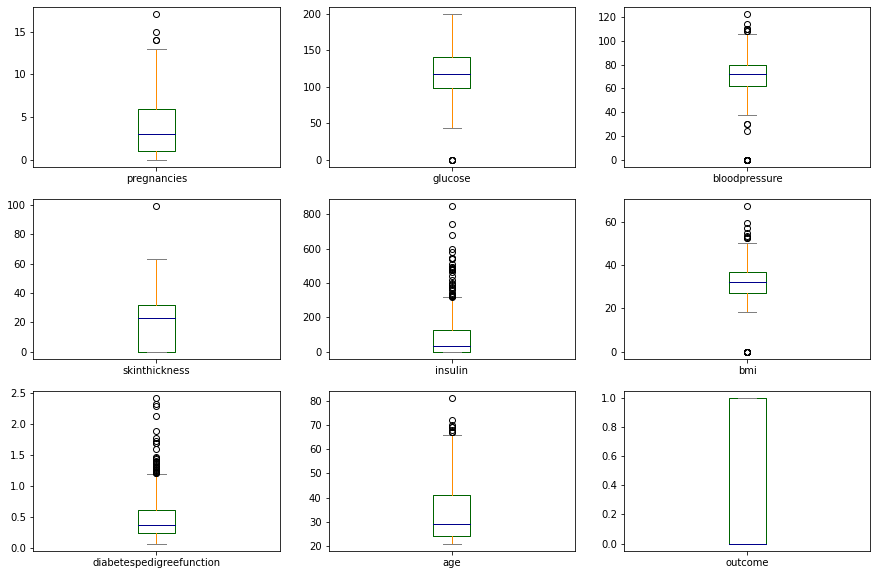

In [8]:
# Box and whisker plot  - to summarize the distribution of each feature
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
# plotting box and whisker
df.plot(kind='box', color=color, figsize=(15,10),
        subplots=True, layout=(3,3), 
        sharex=False, sharey=False)
# display plot
plt.show()

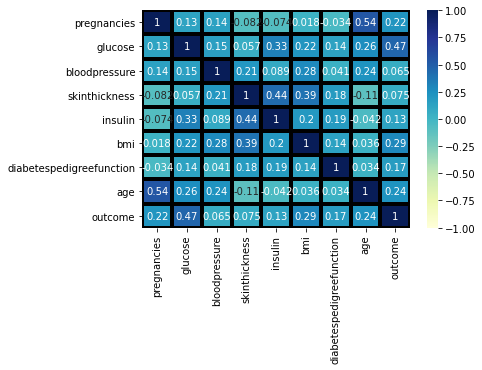

In [9]:
# Heatmap - correlation
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, 
            vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black')
# display plot
plt.show()

<AxesSubplot:>

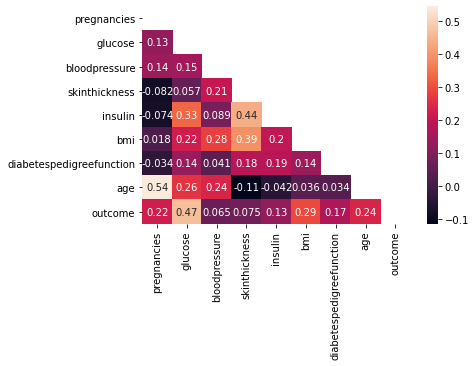

In [10]:
# Heatmap - changing the matrix shape
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)

Value count per class in target feature:
 0    500
1    268
Name: outcome, dtype: int64



Text(0.5, 1.0, 'Target feature count by class')

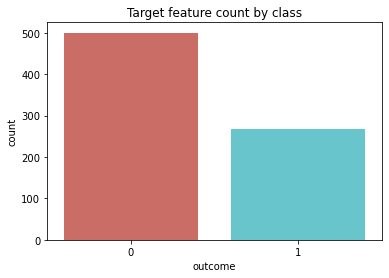

In [11]:
# Target variable distibution
print(f"Value count per class in target feature:\n {df['outcome'].value_counts()}")
print() # blank line
# seaborn countplot
sns.countplot(x='outcome',
              data=df, 
              palette='hls').set_title("Target feature count by class")

# Data preparation for Classification models

In [12]:
# sklearn modules required
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Input/Output data

In [13]:
# divide data into training and validation sets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X[:5])
print()
print(y[:5])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]

[1 0 1 0 1]


# Train/Test Split

In [14]:
# split data into training and test sample
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print("x_train: ",x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (576, 8)
x_test:  (192, 8)
y_train:  (576,)
y_test:  (192,)


# Defining Models

In [15]:
# defining models and comparing with Ensemble - Votting Classifier (hard votting)
def get_hard_votings():
    # models list
    models = list()
    # define the base models
    models.append(('Logistic Regression', LogisticRegression(solver='liblinear'))) 
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('Naive Bayes', GaussianNB()))
    models.append(('Random Forest', RandomForestClassifier()))
    models.append(('SVM', SVC(gamma='auto', kernel='linear')))
    models.append(('NN', MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(2, 4, 6), solver='lbfgs', random_state=32)))
    
    # voting ensemble - need to 'fit' the model
    hard_voting_ensemble = VotingClassifier(estimators=models, voting='hard') # with largest sum of votes from models
    hard_voting_ensemble = hard_voting_ensemble.fit(x_train, y_train)
    
    return hard_voting_ensemble

# Evaluating Model

In [16]:
# models for evaluation
def evaluate_models():
    # empty dictionary
    models = dict()
    # define models
    models['Logistic Regression'] = LogisticRegression(solver='liblinear')
    models['KNN'] = KNeighborsClassifier()
    models['CART'] = DecisionTreeClassifier()
    models['Naive Bayes'] = GaussianNB()
    models['Random Forest'] = RandomForestClassifier()
    models['SVM'] = SVC(gamma='auto', kernel='linear')
    models['NN'] = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(2, 4, 6), solver='lbfgs', random_state=32)
    
    models['Hard Voting Ensemble'] = get_hard_votings()
#     models['Soft Voting Ensemble'] = get_soft_votings()
    
    return models


# evaluating model using Cross-validation
def evaluation(model, x_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, random_state=1, n_repeats=3)
    scores = cross_val_score(model, x_train, y_train, cv = cv,
                             n_jobs=-1, scoring='accuracy', error_score='raise')
    
    return scores


# get the evalutate_models
models = evaluate_models()
# empty list - evaluation and result
results, model_names = list(), list()
for name, model in models.items():
    scores = evaluation(model, x_train, y_train)
    results.append(scores)
    model_names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>Logistic Regression 0.777 (0.037)
>KNN 0.719 (0.043)
>CART 0.688 (0.055)
>Naive Bayes 0.761 (0.046)
>Random Forest 0.770 (0.049)
>SVM 0.783 (0.041)
>NN 0.733 (0.061)
>Hard Voting Ensemble 0.777 (0.039)


# Models Comparison

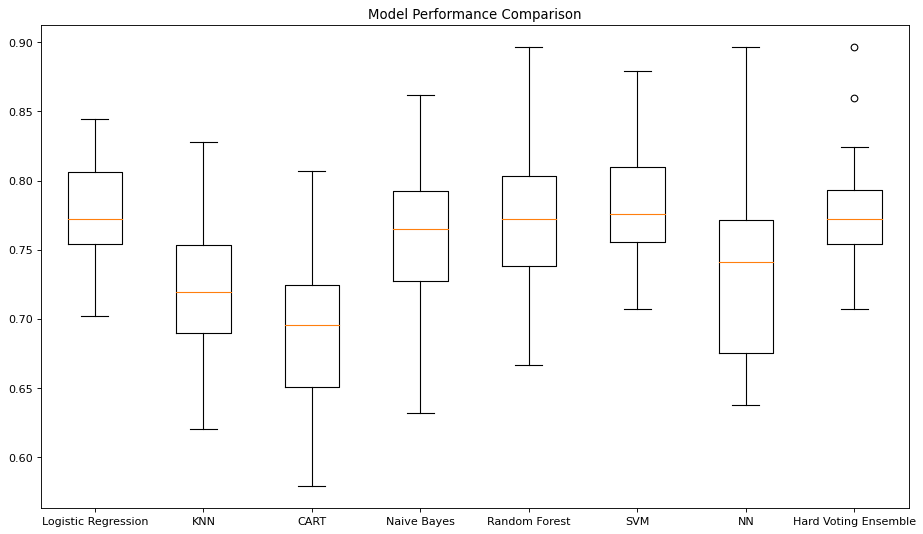

In [17]:
# # Box plot for the performance
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(results, labels=model_names)
plt.title("Model Performance Comparison")
plt.show()

# Chossing best performing model
    - SVM

In [18]:
# function - SVM
def svm_classifier():
    model = SVC(gamma='auto', kernel='linear').fit(x_train, y_train)
    return model

# calling function
classifier = svm_classifier()
print(classifier)

# predictions
y_pred = classifier.predict(x_test)
print(y_pred[:20])

SVC(gamma='auto', kernel='linear')
[0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0]


# Model Validation
    - Confusion Matrix
    - Classification Report

In [19]:
# Confusion Matrix
print("================ Confusion Matrix ================")
print(confusion_matrix(y_test, y_pred))
# Classification report
print("============= Classification Report ==============") 
print(classification_report(y_test, y_pred))

================ Confusion Matrix ================
[[104  21]
 [ 34  33]]
============= Classification Report ==============
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       125
           1       0.61      0.49      0.55        67

    accuracy                           0.71       192
   macro avg       0.68      0.66      0.67       192
weighted avg       0.70      0.71      0.71       192



# ROC (Reciever operating characterstics) Curve